In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import classification_report
from tensorflow import keras


## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# проверим размеры выборок

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Визуализация датасета

**Используйте matplotlib чтобы показать пример картинки.**

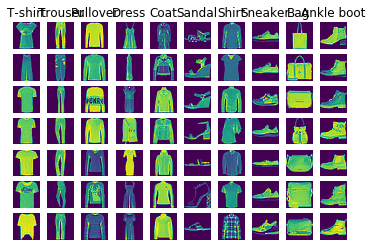

In [4]:
# создадим список из 10 классов разных типов одежды
# визуализируем примеры картинок

classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
plt.figure(0)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [5]:
x_train = x_train / 255
x_test = x_test / 255

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [6]:
# добавим четвёртое измерение
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [7]:
# проверим
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [12]:
# входной слой
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [13]:
# компиляция по заданным параметрам
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [16]:
model.fit(x=x_train, y=y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 111s 474ms/step - loss: 0.3570 - accuracy: 0.8766 - val_loss: 1.9671 - val_accuracy: 0.3181
Epoch 2/20
235/235 [==============================] - 110s 466ms/step - loss: 0.2701 - accuracy: 0.9075 - val_loss: 0.4711 - val_accuracy: 0.8524
Epoch 3/20
235/235 [==============================] - 120s 512ms/step - loss: 0.2307 - accuracy: 0.9191 - val_loss: 0.2540 - val_accuracy: 0.9081
Epoch 4/20
235/235 [==============================] - 174s 743ms/step - loss: 0.2047 - accuracy: 0.9279 - val_loss: 0.2536 - val_accuracy: 0.9075
Epoch 5/20
235/235 [==============================] - 153s 651ms/step - loss: 0.1847 - accuracy: 0.9338 - val_loss: 0.2722 - val_accuracy: 0.9086
Epoch 6/20
235/235 [==============================] - 109s 462ms/step - loss: 0.1668 - accuracy: 0.9401 - val_loss: 0.2843 - val_accuracy: 0.9036
Epoch 7/20
235/235 [==============================] - 108s 459ms/step - loss: 0.1519 - accuracy: 0.9459 - val_loss: 0.2576 -

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [17]:
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.3764 - accuracy: 0.9078
Loss: 0.3764
Accuracy: 0.9078


In [18]:
Y_pred = model.predict(x_test)

In [19]:
Y_true = np.argmax(y_test,axis = 1)

In [20]:
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [21]:
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

     T-shirt       0.92      0.77      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.92      0.79      0.85      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.67      0.86      0.76      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



## Дополнительно

* Добавьте раннюю остановку (Early stopping) в процесс тренировки
* Добавьте логирование с помощью Tensorboard
* Реализуйте модель с помощью Functional API
* Реализуйте модель с помощью Subclassing 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

#### Early stopping

In [25]:
model.save("CNN_fashion_mnist_Exercise_keras_model")
model = keras.models.load_model("CNN_fashion_mnist_Exercise_keras_model")

INFO:tensorflow:Assets written to: CNN_fashion_mnist_Exercise_keras_model\assets


In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_fashion_mnist_Exercise_keras_model")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [31]:
history = model.fit(x_train, y_train, epochs=20, batch_size=256,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
235/235 [==============================] - 119s 507ms/step - loss: 0.0890 - accuracy: 0.9678 - val_loss: 0.3050 - val_accuracy: 0.9142
INFO:tensorflow:Assets written to: CNN_fashion_mnist_Exercise_keras_model\assets
Epoch 2/20
235/235 [==============================] - 120s 511ms/step - loss: 0.0701 - accuracy: 0.9747 - val_loss: 0.3180 - val_accuracy: 0.9139
INFO:tensorflow:Assets written to: CNN_fashion_mnist_Exercise_keras_model\assets
Epoch 3/20
235/235 [==============================] - 119s 508ms/step - loss: 0.0612 - accuracy: 0.9779 - val_loss: 0.3930 - val_accuracy: 0.9126
INFO:tensorflow:Assets written to: CNN_fashion_mnist_Exercise_keras_model\assets
Epoch 4/20
235/235 [==============================] - 116s 493ms/step - loss: 0.0563 - accuracy: 0.9798 - val_loss: 0.3570 - val_accuracy: 0.9140
INFO:tensorflow:Assets written to: CNN_fashion_mnist_Exercise_keras_model\assets
Epoch 5/20
235/235 [==============================] - 113s 479ms/step - loss: 0.0517 - accur

Ранняя остановка Early stopping произошла при обучении модели на эпохе 11/20.

In [32]:
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.3050 - accuracy: 0.9142
Loss: 0.3050
Accuracy: 0.9142


In [33]:
Y_pred = model.predict(x_test)
Y_true = np.argmax(y_test,axis = 1)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

     T-shirt       0.89      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.85      0.86      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.80      0.93      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.77      0.76      0.76      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

